# ALERCE Client ToO Access

Demonstrate access to the ALERCE data stream.

This notebook demonstrates searches for Type Ia SNe.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

In [2]:
mpl.rc('font', size=14)

## Access ALERCE Stream

Import the [ALERCE client](https://alerce.readthedocs.io/en/latest/) and list the classifiers available.

In [3]:
from alerce.core import Alerce
client = Alerce()

In [4]:
client.query_classifiers()

[{'classifier_name': 'lc_classifier',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['SNIa',
   'SNIbc',
   'SNII',
   'SLSN',
   'QSO',
   'AGN',
   'Blazar',
   'CV/Nova',
   'YSO',
   'LPV',
   'E',
   'DSCT',
   'RRL',
   'CEP',
   'Periodic-Other']},
 {'classifier_name': 'lc_classifier_top',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['Transient', 'Stochastic', 'Periodic']},
 {'classifier_name': 'lc_classifier_transient',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['SNIa', 'SNIbc', 'SNII', 'SLSN']},
 {'classifier_name': 'lc_classifier_stochastic',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['QSO', 'AGN', 'Blazar', 'CV/Nova', 'YSO']},
 {'classifier_name': 'lc_classifier_periodic',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['LPV', 'E', 'DSCT', 'RRL', 'CEP', 'Periodic-Other']},
 {'classifier_name': 'stamp_classifier',
  'classifier_versio

### Example: SN Candidates

Grab SN candidates from the ALERCE stream.

Note that you have to *a priori* limit the number of alerts returned, the number of detections, the start MJD, and the threshold classification probability. Tune these knobs as needed.

In [5]:
min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd + 70

# List of SN classes from the ALERCE client.
sn_types = ['SNIa', 'SNIbc', 'SNII', 'SLSN']
sne = []

for sn in sn_types:
    sne.append(client.query_objects(classifier="lc_classifier",
                                    class_name=sn, 
                                    probability=0.4,
                                    ndet=[10, 50],
                                    order_by="probability",
                                    order_mode="DESC",
                                    first_mjd=[min_firstmjd, None],
                                    page_size=1000, format='pandas'))
    
    print(sn, sne[-1].shape)
    sne[-1].set_index("oid", inplace=True)
    print(sne[-1].head())

SNIa (1000, 23)
             ndethist  ncovhist  mjdstarthist    mjdendhist  corrected  \
oid                                                                      
ZTF19abahvdh       27       135  58652.172269  58705.165648      False   
ZTF20abkljlp       83      1741  59038.225984  59080.183519       True   
ZTF21aakzmaq       37       533  59260.255336  59304.149780      False   
ZTF20abcsbux       42       427  58995.300833  59052.243657       True   
ZTF20aaeopvv       23       426  58748.321470  58894.125127      False   

              stellar  ndet   g_r_max  g_r_max_corr  g_r_mean  ...  \
oid                                                            ...   
ZTF19abahvdh    False    25 -0.205154           NaN -0.130726  ...   
ZTF20abkljlp    False    25 -0.050716      0.002343 -0.056625  ...   
ZTF21aakzmaq    False    24 -0.123005           NaN -0.151552  ...   
ZTF20abcsbux    False    32 -0.132202     -0.093873 -0.178211  ...   
ZTF20aaeopvv    False    22 -0.091257        

In [6]:
sne[0]

,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abahvdh,27,135,58652.172269,58705.165648,False,False,25,-0.205154,NaN,-0.130726,...,58705.165648,52.993380,232.864384,7.095238,0.000024,0.000030,SNIa,lc_classifier,0.522000,corr_bulk_0.0.1
ZTF20abkljlp,83,1741,59038.225984,59080.183519,True,False,25,-0.050716,0.002343,-0.056625,...,59080.182581,41.956597,269.890903,31.911735,0.000030,0.000026,SNIa,lc_classifier,0.521792,corr_bulk_0.0.1
ZTF21aakzmaq,37,533,59260.255336,59304.149780,False,False,24,-0.123005,NaN,-0.151552,...,59304.149780,43.894445,129.871324,-1.408097,0.000033,0.000033,SNIa,lc_classifier,0.520000,correction_0.0.1
ZTF20abcsbux,42,427,58995.300833,59052.243657,True,False,32,-0.132202,-0.093873,-0.178211,...,59052.243657,56.942824,220.541607,11.155926,0.000028,0.000027,SNIa,lc_classifier,0.517920,corr_bulk_0.0.1
ZTF20aaeopvv,23,426,58748.321470,58894.125127,False,False,22,-0.091257,NaN,-0.094938,...,58894.125127,38.018484,17.344253,21.724097,0.000039,0.000024,SNIa,lc_classifier,0.516000,corr_bulk_0.0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF19acbnhkd,33,359,58756.433032,58812.268750,False,False,27,0.010012,NaN,0.062292,...,58812.268750,55.835718,76.072564,70.924027,0.000069,0.000036,SNIa,lc_classifier,0.400000,corr_bulk_0.0.1
ZTF19aawnqoj,33,133,58636.211343,58695.222338,True,False,27,-0.009344,0.172966,0.176634,...,58695.222338,59.010995,233.214653,6.294622,0.000028,0.000033,SNIa,lc_classifier,0.400000,corr_bulk_0.0.1
ZTF18acbxsap,45,123,58423.242616,58487.098299,False,False,14,0.071913,NaN,-0.509832,...,58487.098299,63.854768,7.237576,-3.643241,0.000021,0.000032,SNIa,lc_classifier,0.400000,corr_bulk_0.0.1


## Basic Properties

Plot some properties of the retrieved sample.

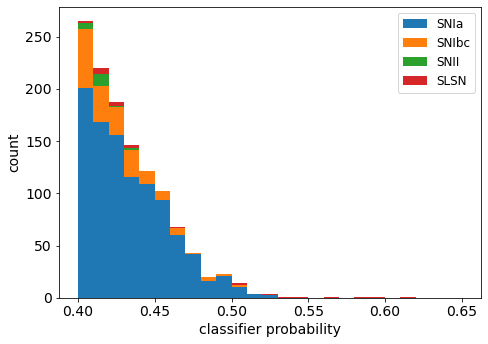

In [7]:
probs = [sn['probability'] for sn in sne]

fig, ax = plt.subplots(1,1, figsize=(7,5), tight_layout=True)
ax.hist(probs, bins=np.linspace(0.4, 0.65, 26), stacked=True, label=sn_types)
ax.set(xlabel='classifier probability',
       ylabel='count')
ax.legend(fontsize=12);

## Candidate Positions

In [8]:
def plot_radec(ra, dec):
    """Mollweide projection plot adapted to astro coordinates.
    
    Parameters
    ----------
    ra : pandas.Series or list
        List of candidate RA [deg].
    dec : pandas.Series or list
        List of candidate Dec [deg].
    
    Returns
    -------
    fig : matplotlib.Figure
        Figure object to let user apply further plot manipulation.
    """
    # Convert RA, Dec to radians.
    # Rotate the RA so that the plot goes 360->0 left to right.
    _ra = np.radians(ra.apply(lambda x: 180 - x))
    _dec = np.radians(dec)

    fig, ax = plt.subplots(1,1, figsize=(8,4), subplot_kw={'projection': 'mollweide'})
    ax.scatter(_ra, _dec, alpha=0.5)
    ax.set(xticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           xticklabels=['22h', '20h', '18h', '16h', '14h', '12h', '10h', '8h', '6h', '4h', '2h'])
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(ls=':')
    fig.tight_layout()
    
    return fig;

### SNe Ia Locations

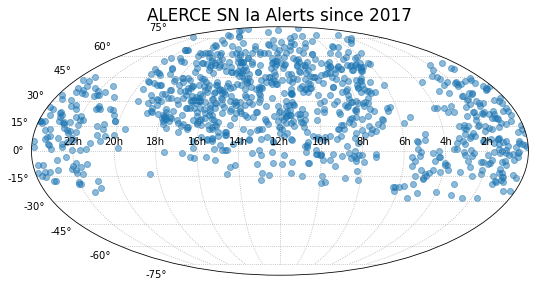

In [9]:
fig = plot_radec(sne[0]['meanra'], sne[0]['meandec'])
ax = fig.gca()
ax.set(title='ALERCE SN Ia Alerts since 2017');

### All SNe Locations

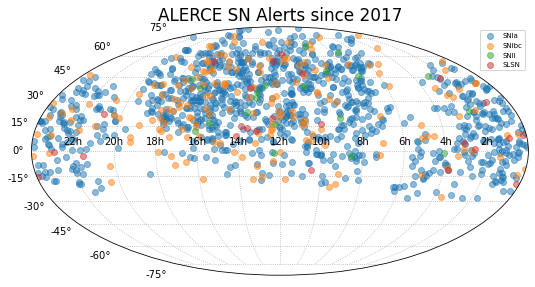

In [10]:
for j, (sn, typ) in enumerate(zip(sne, sn_types)):
    if j == 0:
        fig = plot_radec(sne[0]['meanra'], sne[0]['meandec'])
        ax = fig.gca()
        ax.collections[-1].set_label(typ)
    else:
        _ra = np.radians(sn['meanra'].apply(lambda x: 180 - x))
        _dec = np.radians(sn['meandec'])
        ax.scatter(_ra, _dec, alpha=0.5, label=typ)
    
ax.set(title='ALERCE SN Alerts since 2017');
ax.legend(fontsize=7);

### Recent Alerts

Plot RA, Dec of SN Ia candidates observed within the last 14 days.

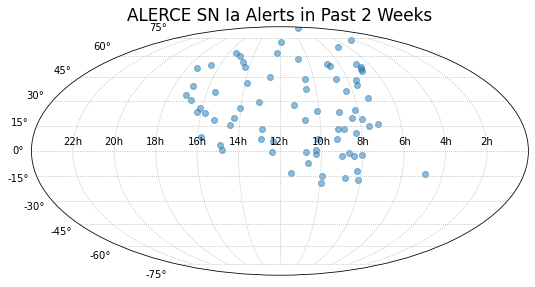

In [11]:
times = Time(sne[0]['lastmjd'], format='mjd')
dt = Time.now() - times

recent = dt < 14
fig = plot_radec(sne[0]['meanra'][recent], sne[0]['meandec'][recent])
ax = fig.gca()
ax.set(title='ALERCE SN Ia Alerts in Past 2 Weeks');

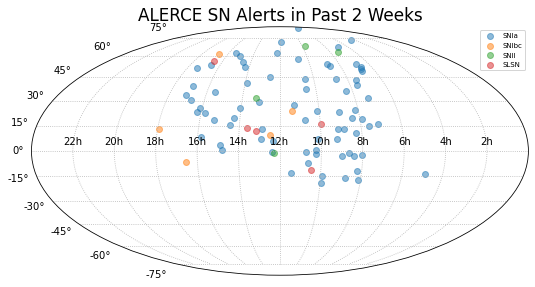

In [12]:
for j, (sn, typ) in enumerate(zip(sne, sn_types)):
    times = Time(sn['lastmjd'], format='mjd')
    dt = Time.now() - times
    recent = dt < 14

    if j == 0:
        fig = plot_radec(sne[0]['meanra'][recent], sne[0]['meandec'][recent])
        ax = fig.gca()
        ax.collections[-1].set_label(typ)
    else:
        _ra = np.radians(sn['meanra'][recent].apply(lambda x: 180 - x))
        _dec = np.radians(sn['meandec'][recent])
        ax.scatter(_ra, _dec, alpha=0.5, label=typ)
    
ax.set(title='ALERCE SN Alerts in Past 2 Weeks');
ax.legend(fontsize=7);